# Data Preprocessing

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [2]:
df = pd.read_csv('D:/Projects/Netflix Movie Recommendation/Top_10000_Movies.csv', engine='python', index_col=[0])
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


In [3]:
# df.rename( columns={'Unnamed: 0':'sr. no.'}, inplace=True )
# df

Exploring Dataset

In [4]:
df.shape

(10014, 12)

In [5]:
df.columns

Index(['id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline'],
      dtype='object')

In [6]:
df.isnull().sum()

id                     12
original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

Handling Missing Values

In [7]:
df = df.dropna(subset=['id'])

In [8]:
df.isnull().sum()

id                      0
original_language       0
original_title          1
popularity              2
release_date           40
vote_average            2
vote_count              2
genre                   2
overview              102
revenue                 4
runtime                13
tagline              2923
dtype: int64

In [9]:
df = df.dropna(subset=['vote_average'])
df.isnull().sum()

id                      0
original_language       0
original_title          0
popularity              0
release_date           38
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 2
runtime                11
tagline              2921
dtype: int64

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [11]:
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,NaN
9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


In [12]:
# Missing release date
df['release_date'] = df['release_date'].fillna('Unknown')
df.isnull().sum()

id                      0
original_language       0
original_title          0
popularity              0
release_date            0
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 2
runtime                11
tagline              2921
dtype: int64

In [13]:
df['runtime'].describe()

count    9989.000000
mean       98.792772
std        28.771525
min         0.000000
25%        89.000000
50%        99.000000
75%       113.000000
max       400.000000
Name: runtime, dtype: float64

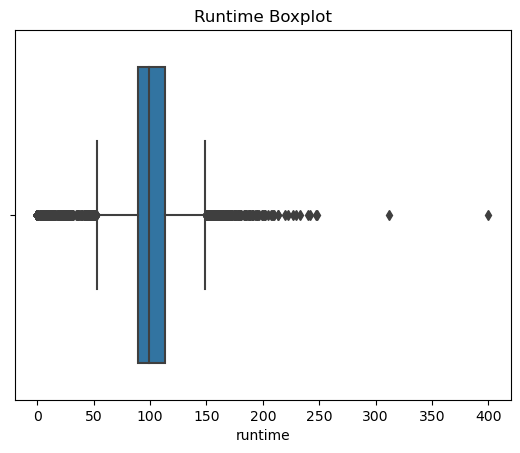

In [14]:
sns.boxplot(x=df['runtime'])
plt.title('Runtime Boxplot')
plt.show()

In [15]:
# Handling missing values in runtime
mean_runtime = df['runtime'].mean()
df['runtime'] = df['runtime'].fillna(mean_runtime)

In [16]:
df.isnull().sum()

id                      0
original_language       0
original_title          0
popularity              0
release_date            0
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 2
runtime                 0
tagline              2921
dtype: int64

In [17]:
# Handling missing values in revenue
mode_revenue = df['revenue'].mean()
df['revenue'] = df['revenue'].fillna(mode_revenue)

df.isnull().sum()

id                      0
original_language       0
original_title          0
popularity              0
release_date            0
vote_average            0
vote_count              0
genre                   0
overview              100
revenue                 0
runtime                 0
tagline              2921
dtype: int64

In [18]:
# Missing values in overview and tagline
df['overview'] = df['overview'].fillna('No overview available')
df['tagline'] = df['tagline'].fillna('No tagline available')

df.isnull().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
genre                0
overview             0
revenue              0
runtime              0
tagline              0
dtype: int64

In [19]:
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30 00:00:00,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,No tagline available
1,524434.0,en,Eternals,3365.535,2021-11-03 00:00:00,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15 00:00:00,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27 00:00:00,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11 00:00:00,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530.0,en,A Grand Day Out,9.266,1990-05-18 00:00:00,7.5,594.0,"['Adventure', 'Animation', 'Comedy', 'Science ...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,No tagline available
9996,15934.0,en,El cantante,10.417,2006-09-12 00:00:00,7.0,80.0,"['History', 'Drama', 'Music']","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ..."
9997,162215.0,en,How I Live Now,9.520,2013-09-10 00:00:00,6.6,705.0,"['Drama', 'Action', 'Thriller', 'War']",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home
9998,5723.0,en,Once,9.267,2007-03-23 00:00:00,7.4,990.0,"['Drama', 'Music', 'Romance']",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?


We eleminated all the missing values

# Visualization

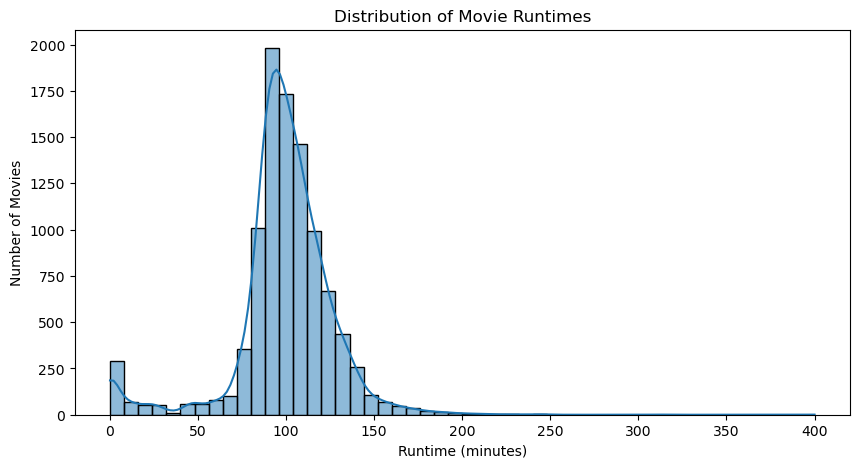

In [20]:
# Distribution of Movie Runtimes
plt.figure(figsize=(10, 5))
sns.histplot(df['runtime'], bins=50, kde = True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

In [21]:
# How many datapoints for each class are present
df['genre'].value_counts()

genre
['Drama']                                                             533
['Comedy']                                                            440
['Horror']                                                            239
['Drama', 'Romance']                                                  209
['Horror', 'Thriller']                                                206
                                                                     ... 
['Thriller', 'Action', 'Comedy', 'Science Fiction']                     1
['Animation', 'Comedy', 'Family', 'Romance']                            1
['Family', 'Animation', 'Comedy', 'Adventure', 'Fantasy', 'Music']      1
['Family', 'Animation', 'Romance', 'Adventure']                         1
['Adventure', 'Animation', 'Comedy', 'Science Fiction', 'Family']       1
Name: count, Length: 2314, dtype: int64

In [22]:
df['original_language'].value_counts()

original_language
en    7798
ja     609
es     417
fr     293
ko     140
it     104
zh     103
cn      79
de      78
ru      69
pt      55
hi      30
da      30
no      24
sv      22
nl      19
pl      19
th      15
id      15
tr      10
he       9
cs       6
fi       6
fa       5
uk       5
sr       4
hu       4
te       3
tl       3
lv       3
el       3
eu       2
ro       2
ta       2
is       2
nb       1
ar       1
ca       1
la       1
ms       1
ga       1
bn       1
sk       1
ka       1
ml       1
be       1
ur       1
Name: count, dtype: int64

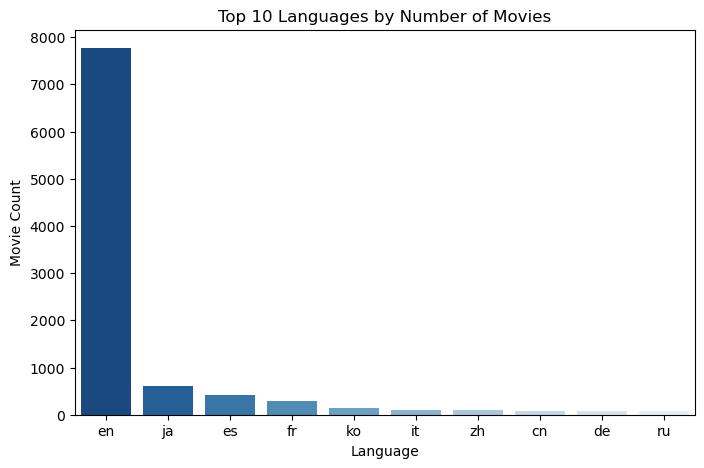

In [144]:
top_lang = df['original_language'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_lang.index, y=top_lang.values, palette='Blues_r')
plt.title('Top 10 Languages by Number of Movies')
plt.xlabel('Language')
plt.ylabel('Movie Count')
plt.show()

<Axes: xlabel='vote_average', ylabel='popularity'>

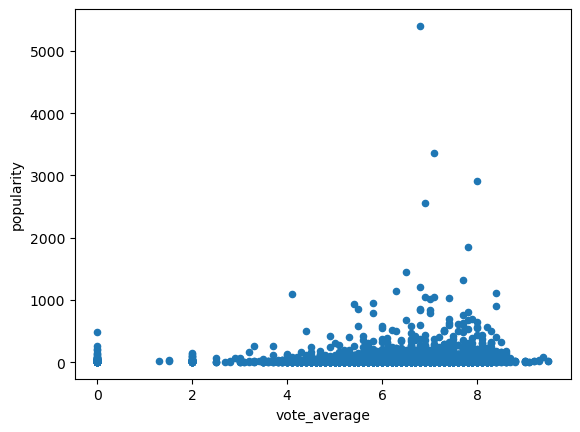

In [145]:
# 2-D scatter plot
df.plot(kind = 'scatter', x = 'vote_average', y = 'popularity')

C:\Users\prani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\prani\anaconda3\Lib

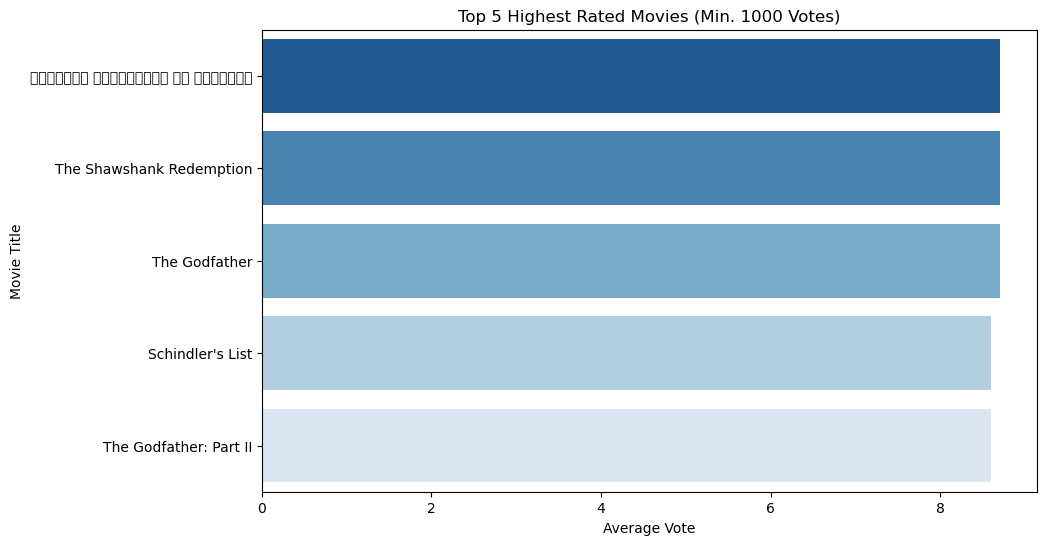

In [146]:
high_rated = df[df['vote_count'] > 1000].sort_values('vote_average', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=high_rated, x='vote_average', y='original_title', palette='Blues_r')
plt.title('Top 5 Highest Rated Movies (Min. 1000 Votes)')
plt.xlabel('Average Vote')
plt.ylabel('Movie Title')
plt.show()

In [147]:
# Make sure release_date is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# # Drop rows with missing/invalid dates
# df = df.dropna(subset=['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year

# Count movies per year
yearly_counts = df['release_year'].value_counts().sort_index()

# Display the year with the most releases
most_releases_year = yearly_counts.idxmax()
most_releases_count = yearly_counts.max()

print(f"The year with the highest number of releases is {most_releases_year} with {most_releases_count} movies.")


The year with the highest number of releases is 2021 with 856 movies.


C:\Users\prani\AppData\Local\Temp\ipykernel_25348\89576521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
C:\Users\prani\AppData\Local\Temp\ipykernel_25348\89576521.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year


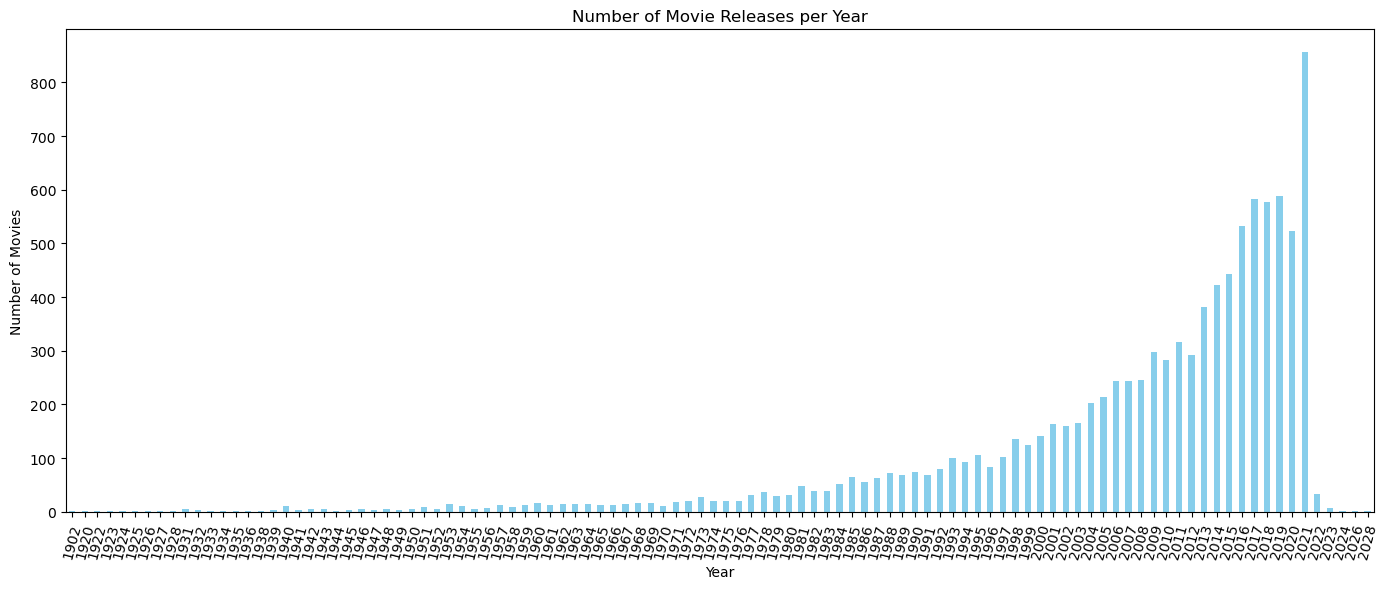

In [181]:
# Plot the number of releases by year

plt.figure(figsize=(14,6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movie Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [182]:
df

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline,release_year
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"[Science Fiction, Action, Adventure]",After finding a host body in investigative rep...,424000000.0,97.0,No tagline available,2021
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"[Action, Adventure, Science Fiction, Fantasy]",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...,2021
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"[Action, Adventure, Science Fiction]","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits.",2021
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"[Action, Crime, Thriller]",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend.",2021
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"[Comedy, Action, Adventure, Science Fiction]",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530.0,en,A Grand Day Out,9.266,1990-05-18,7.5,594.0,"[Adventure, Animation, Comedy, Science Fiction...",Wallace and Gromit have run out of cheese and ...,0.0,23.0,No tagline available,1990
9996,15934.0,en,El cantante,10.417,2006-09-12,7.0,80.0,"[History, Drama, Music]","The rise and fall of salsa singer, Héctor Lavo...",0.0,116.0,"Based on the true story of the King of Salsa, ...",2006
9997,162215.0,en,How I Live Now,9.520,2013-09-10,6.6,705.0,"[Drama, Action, Thriller, War]",An American girl on holiday in the English cou...,0.0,101.0,Love will lead you home,2013
9998,5723.0,en,Once,9.267,2007-03-23,7.4,990.0,"[Drama, Music, Romance]",A vacuum repairman moonlights as a street musi...,20710513.0,85.0,How often do you find the right person?,2007


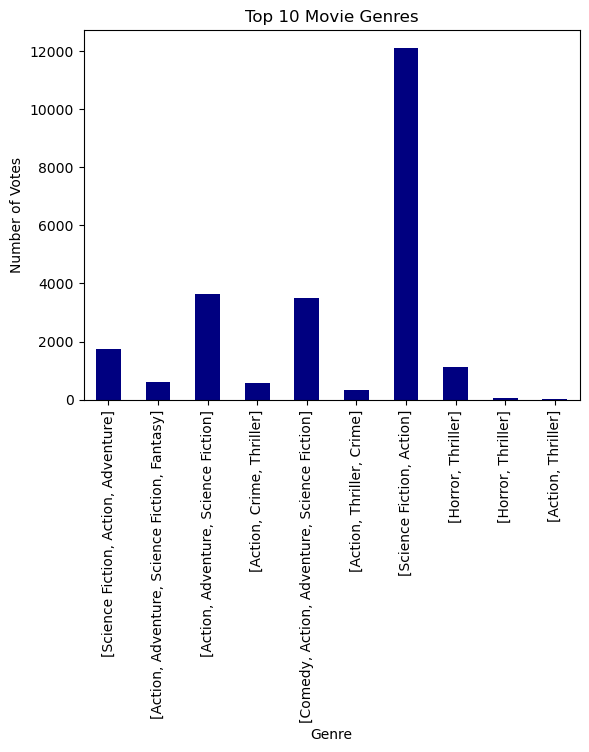

<Figure size 1000x600 with 0 Axes>

In [183]:
# Movies per Genre

df.head(10).plot(kind='bar', x='genre', y='vote_count', color='navy', legend=False)
plt.title('Top 10 Movie Genres')
plt.ylabel('Number of Votes')
plt.xlabel('Genre')
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

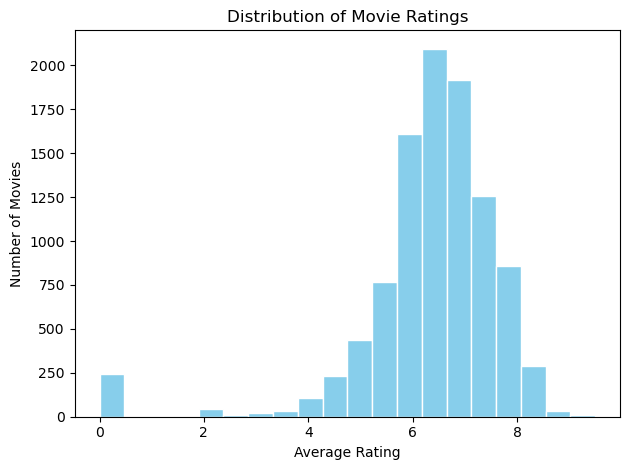

In [184]:
df['vote_average'].plot(kind='hist', bins=20, color='skyblue', edgecolor='white')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

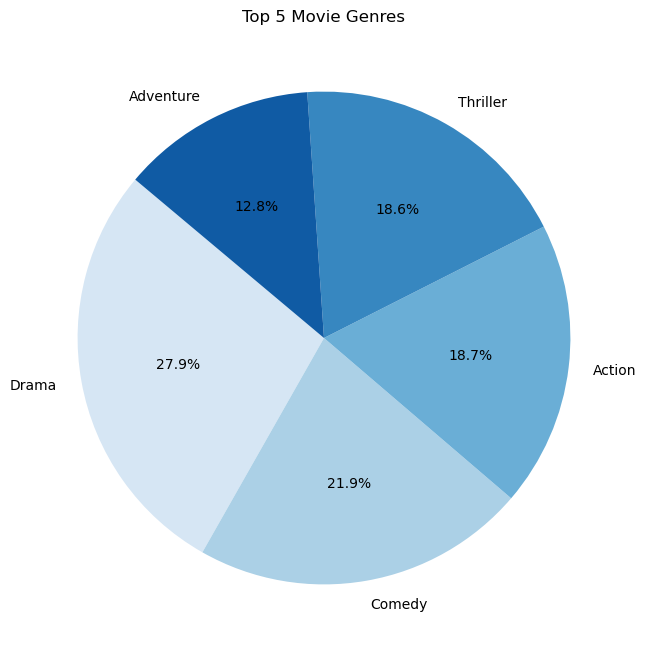

In [185]:
# # Flatten the genre column
# from ast import literal_eval

# # Convert string list to actual list
# df['genre'] = df['genre'].apply(lambda x: literal_eval(x) if pd.notnull(x) else [])

# # Create a flat list of all genres
# all_genres = df['genre'].explode()

# # Count top genres
# top_genres = all_genres.value_counts().head(5)

# # Plot as pie chart
plt.figure(figsize=(8,8))
colors = sns.color_palette("Blues", len(top_genres))
top_genres.plot.pie(autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Top 5 Movie Genres')
plt.ylabel('')  # Hide y-label
plt.show()


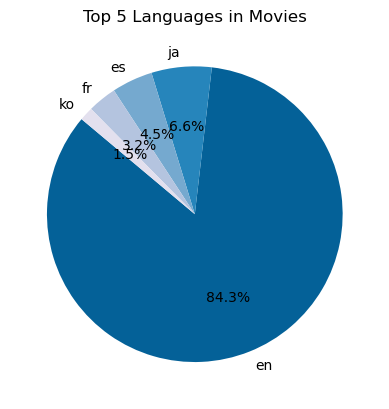

In [186]:
top_langs = df['original_language'].value_counts().head(5)
colors = sns.color_palette("PuBu_r", len(top_genres))
top_langs.plot.pie(autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Languages in Movies')
plt.ylabel('')
plt.show()

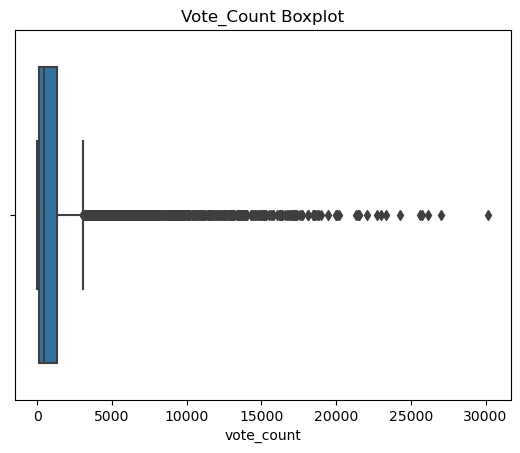

In [187]:
sns.boxplot(x=df['vote_count'])
plt.title('Vote_Count Boxplot')
plt.show()